# Demos: Lecture 7

## Demo 1: Deutsch's algorithm


<img src="fig/deutsch_2.png">

<img src="fig/deutsch_oracles.png" width="400px">

In [2]:
import pennylane as qml
import numpy as np

/opt/conda/envs/pennylane/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [12]:
def oracle_f1():
    pass

def oracle_f2():
    qml.PauliX(wires=1)
    
def oracle_f3():
    qml.CNOT(wires=[0, 1])
    
def oracle_f4():
    qml.MultiControlledX(control_wires=0, wires=1, control_values='0')
    
oracle_dict = {
    1: oracle_f1,
    2: oracle_f2,
    3: oracle_f3,
    4: oracle_f4
}
    
    
def oracle(func_id=None):
    oracle_dict[func_id]()

In [13]:
def deutsch_circuit(func_id=None):
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    
    qml.Hadamard(wires=0)
    
    oracle(func_id=func_id)
    
    qml.Hadamard(wires=0)
    
    return qml.probs(wires=0)

In [14]:
dev = qml.device('default.qubit', wires=2)

deutsch_qnode = qml.QNode(deutsch_circuit, dev)

In [17]:
deutsch_qnode(func_id=2)

tensor([1., 0.], requires_grad=True)

## Demo 2: Grover's algorithm

<img src="fig/grover_full.png" width="500px">

In [18]:
dev = qml.device('default.qubit', wires=6)


def hadamard_transform(wires=None):
    for wire in wires:
        qml.Hadamard(wires=wire)


def initialize_everything():
    qml.PauliX(wires=5)
    hadamard_transform(wires=range(6))


def diffusion():
    hadamard_transform(wires=range(5))
    qml.MultiControlledX(control_wires=range(5), wires=5, control_values='00000')
    hadamard_transform(wires=range(5))

    
def oracle():
    qml.MultiControlledX(control_wires=range(5), wires=5, control_values='11110')    
    
    
def grover(num_steps=1):
    initialize_everything()
    
    for _ in range(num_steps):
        oracle()
        diffusion()
        
    return qml.probs(wires=range(5))

In [19]:
grover_qnode = qml.QNode(grover, dev)

In [21]:
grover_qnode(num_steps=2)

tensor([0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.01282501, 0.01282501, 0.01282501, 0.01282501, 0.01282501,
        0.60242462, 0.01282501], requires_grad=True)

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 32 artists>

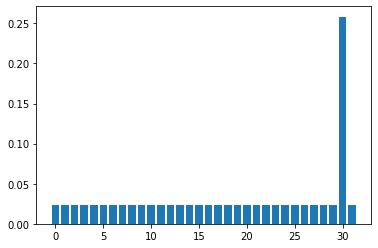

In [23]:
plt.bar(range(32), grover_qnode(num_steps=1))

<BarContainer object of 32 artists>

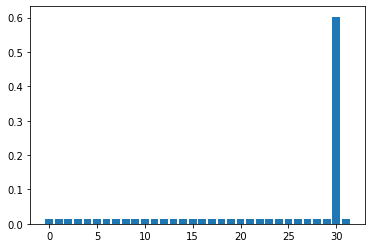

In [24]:
plt.bar(range(32), grover_qnode(num_steps=2))

<BarContainer object of 32 artists>

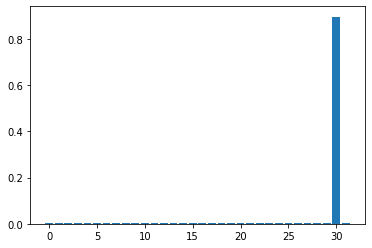

In [25]:
plt.bar(range(32), grover_qnode(num_steps=3))

In [26]:
grover_qnode(num_steps=3)

tensor([0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.00332463, 0.00332463, 0.00332463, 0.00332463, 0.00332463,
        0.89693654, 0.00332463], requires_grad=True)

<BarContainer object of 32 artists>

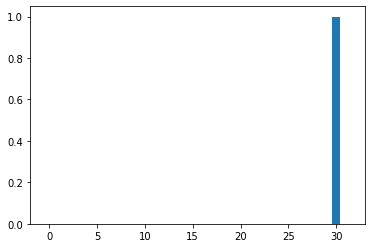

In [27]:
plt.bar(range(32), grover_qnode(num_steps=4))

In [28]:
grover_qnode(num_steps=4)

tensor([2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 2.63769180e-05, 2.63769180e-05,
        2.63769180e-05, 2.63769180e-05, 9.99182316e-01, 2.63769180e-05], requires_grad=True)

In [29]:
grover_qnode(num_steps=5)

tensor([0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.00452785, 0.00452785, 0.00452785, 0.00452785, 0.00452785,
        0.85963666, 0.00452785], requires_grad=True)

<BarContainer object of 32 artists>

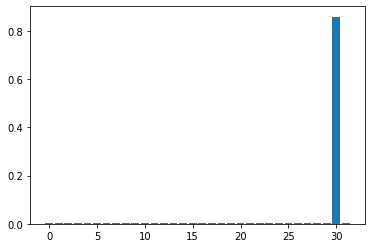

In [30]:
plt.bar(range(32), grover_qnode(num_steps=5))

<BarContainer object of 32 artists>

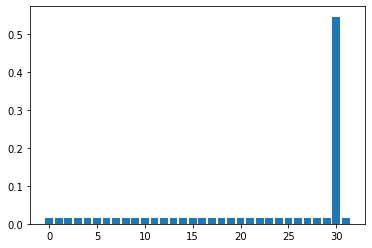

In [31]:
plt.bar(range(32), grover_qnode(num_steps=6))

<BarContainer object of 32 artists>

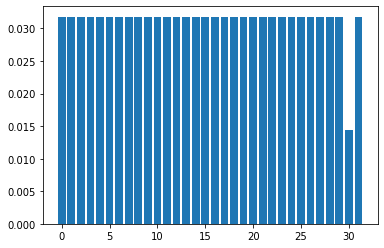

In [32]:
plt.bar(range(32), grover_qnode(num_steps=8))

<BarContainer object of 32 artists>

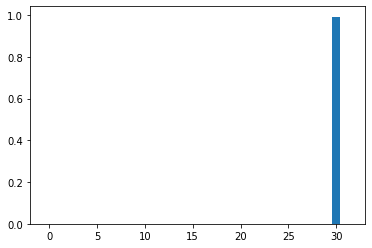

In [33]:
plt.bar(range(32), grover_qnode(num_steps=13))